## International Airline Passenger Forecasting using ARIMA and AR Model

# ARIMA Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\international-airline-passengers.csv",parse_dates=["Month"])
df

,Month,International airline passengers: monthly totals in thousands.,49,?,Dec,"60"""
0,1949-01,112,NaN,NaN,NaN,NaN
1,1949-02,118,NaN,NaN,NaN,NaN
2,1949-03,132,NaN,NaN,NaN,NaN
3,1949-04,129,NaN,NaN,NaN,NaN
4,1949-05,121,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
141,1960-10,461,NaN,NaN,NaN,NaN
142,1960-11,390,NaN,NaN,NaN,NaN
143,1960-12,432,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning Process

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Month                                                           145 non-null    object 
 1   International airline passengers: monthly totals in thousands.  145 non-null    object 
 2   49                                                              1 non-null      float64
 3   ?                                                               0 non-null      float64
 4   Dec                                                             0 non-null      float64
 5   60"                                                             0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 7.0+ KB


In [98]:
x=df.iloc[:,:2]

In [99]:
x

,Month,International airline passengers: monthly totals in thousands.
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
141,1960-10,461
142,1960-11,390
143,1960-12,432
144,NaN,NaN


In [100]:
x.isna().sum()

Month                                                             1
International airline passengers: monthly totals in thousands.    1
dtype: int64

In [101]:
x.shape

(146, 2)

In [102]:
x.dropna()

,Month,International airline passengers: monthly totals in thousands.
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [103]:
y=x.drop(145)

In [104]:
y.rename(columns={'International airline passengers: monthly totals in thousands.':"Passengers"},inplace=True)
y

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [105]:
y.dropna()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [106]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [107]:
y["Passengers"]=y["Passengers"].astype(float)

In [108]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


# Data Visualization

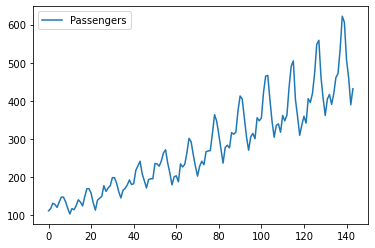

In [134]:
y.plot()

In [135]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(y.Passengers)
pval=res[1]
if pval<0.05:
    print(" it is stationary")
else:
    print("It is not stationary")

It is not stationary


C:\Users\Krishna\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [136]:
df_diff1=y.Passengers.diff()
df_diff2=y.Passengers.diff().diff()

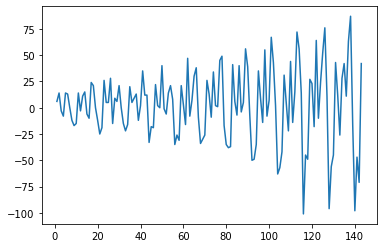

In [137]:
df_diff1.plot()

In [138]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df_diff2.dropna())
pval=res[1]
if pval<0.05:
    print(" it is stationary")
else:
    print("It is not stationary")

 it is stationary


In [139]:
#d=1
#log order

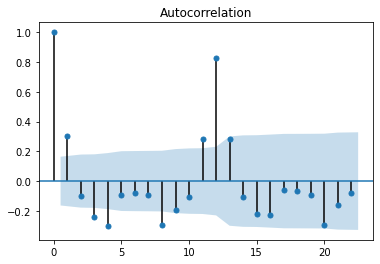

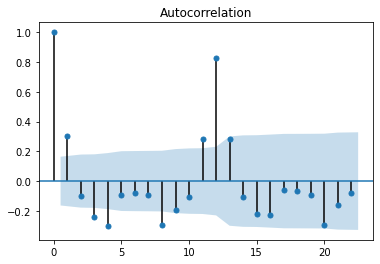

In [140]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_diff1.dropna())

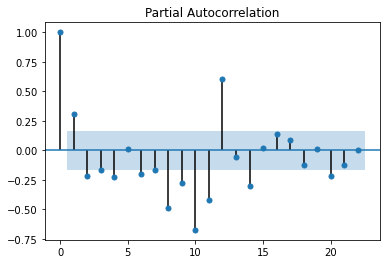

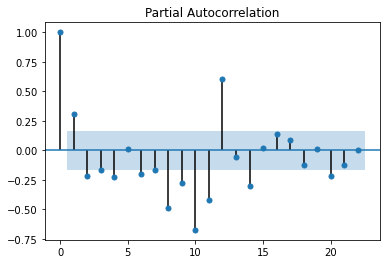

In [141]:
plot_pacf(df_diff1.dropna())

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


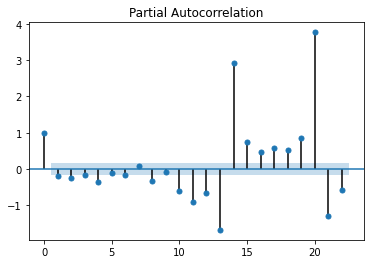

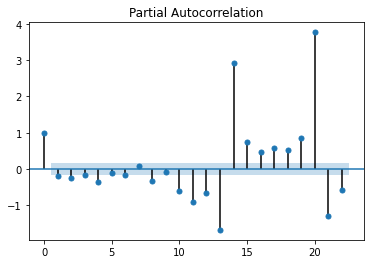

In [142]:
plot_pacf(df_diff2.dropna())

In [143]:
# diff d=1 lag order p-->1
# diff d=2 lag order p-->6,7 q=1

In [226]:
a=y.dropna()
a

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


# Model

In [155]:
from statsmodels.tsa.arima_model import ARIMA

In [160]:
model=ARIMA(a.Passengers,order=(2,1,2))

In [163]:
m=model.fit(disp=0)

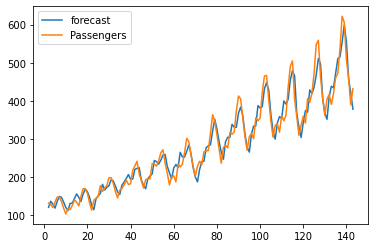

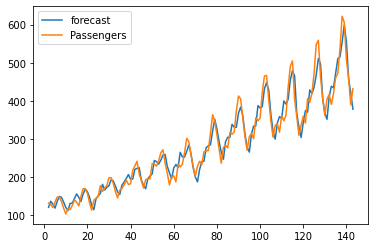

In [164]:
m.plot_predict(dynamic=False)

In [165]:
m.resid

1       3.468873
2      10.648914
3      -8.221927
4      -8.789252
5      15.831234
         ...    
139     6.950987
140   -47.146178
141     2.989342
142   -31.187099
143    53.482929
Length: 143, dtype: float64

In [245]:
m.resid.mean()

2.1862853408003084e-16

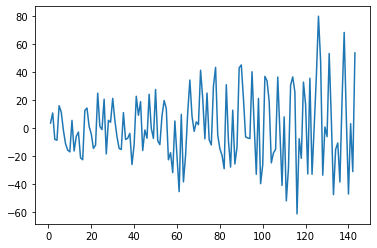

In [166]:
m.resid.plot()

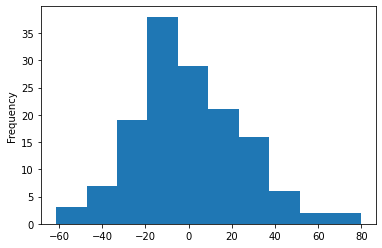

In [167]:
m.resid.plot(kind="hist")

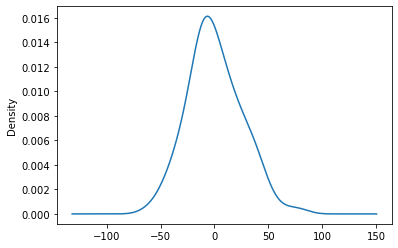

In [168]:
m.resid.plot(kind="kde")

# AutoRegression

In [227]:
a

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [228]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


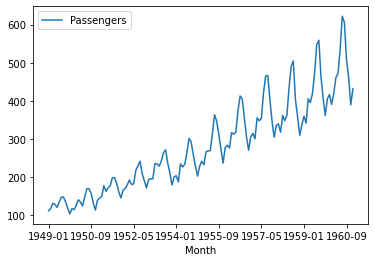

In [229]:
a.plot(x="Month",y="Passengers")

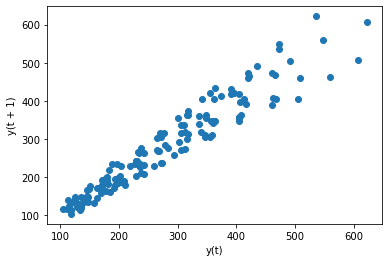

In [230]:
pd.plotting.lag_plot(a.Passengers)

In [231]:
# autocorralation ACP

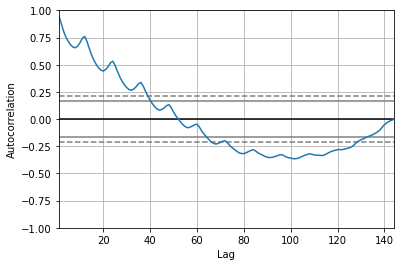

In [232]:
pd.plotting.autocorrelation_plot(a.Passengers)

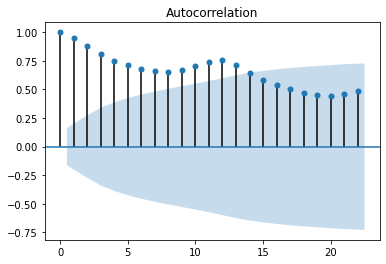

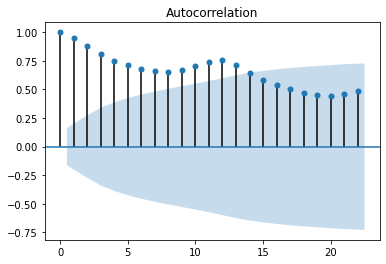

In [233]:
# p-- lag order--> AR auto regression
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(a.Passengers)

In [234]:
a["Psg_diff"]=a.Passengers.diff()

<ipython-input-234-77df3193e476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Psg_diff"]=a.Passengers.diff()


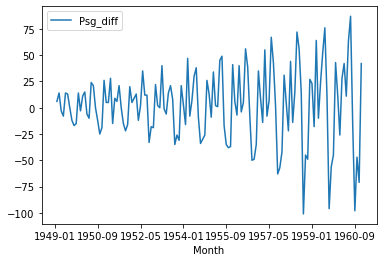

In [235]:
a.plot(x="Month",y="Psg_diff")

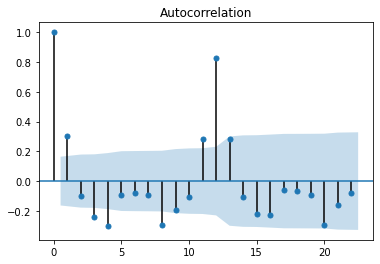

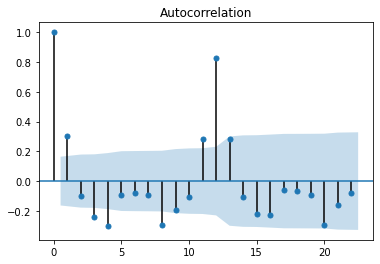

In [236]:
plot_acf(a.Psg_diff.dropna())

In [237]:
a.Psg_diff.dropna()

1       6.0
2      14.0
3      -3.0
4      -8.0
5      14.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Psg_diff, Length: 143, dtype: float64

In [238]:
from statsmodels.tsa.ar_model import AR

In [239]:
model=AR(a.Psg_diff.dropna())
m=model.fit()

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C

In [240]:
m.k_ar  #lag value used by model

13

In [241]:
m.params

const           5.821280
L1.Psg_diff    -0.431277
L2.Psg_diff    -0.237514
L3.Psg_diff    -0.133261
L4.Psg_diff    -0.228982
L5.Psg_diff    -0.112024
L6.Psg_diff    -0.224406
L7.Psg_diff    -0.145896
L8.Psg_diff    -0.299429
L9.Psg_diff    -0.102965
L10.Psg_diff   -0.255440
L11.Psg_diff   -0.089172
L12.Psg_diff    0.779033
L13.Psg_diff    0.401068
dtype: float64

In [242]:
prediction=m.predict(dynamic=False)

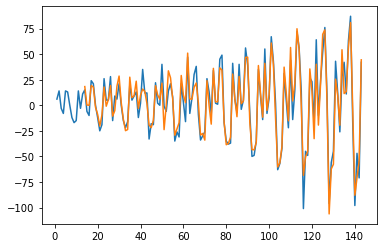

In [244]:
plt.plot(a.Psg_diff)
plt.plot(prediction)